

Ci-dessous, nous allons utiliser les algorithmes de classification pour créer un modèle basé sur nos données de formation et évaluer nos données de test à l'aide des métriques d'évaluation.

Nous utiliserons certains des algorithmes suivants:

1. Régression linéaire
2. KNN
3. Arbres de décision
4. Régression logistique
5. SVM

Nous évaluerons nos modèles en utilisant :

1. Score de précision : Accuracy Score
2. Index Jaccard
3. Score F1
4. Perte de journal : LogLoss
5. Erreur absolue moyenne : Mean Absolute Error
6. Erreur quadratique moyenne : Mean Squared Error
7. Score R2 : R2-Score


## A propos de la base des données
La source originale des données est le Bureau de météorologie du gouvernement australien et les données les plus récentes peuvent être collectées à partir de [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au /climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

L'ensemble de données à utiliser comporte des colonnes supplémentaires telles que « RainToday » et notre cible est « RainTomorrow », qui a été collectée à partir du Rattle à l'adresse [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData] (https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkills Réseau20718538-2022-01-01)

Cet ensemble de données contient des observations de mesures météorologiques pour chaque jour de 2008 à 2017. L'ensemble de données **weatherAUS.csv** comprend les champs suivants :

| Champ | Descriptif | Unité | Tapez |
| ------------- | -------------------------------------------------- --- | --------------- | ------ |
| Date | Date de l'observation en AAAA-MM-JJ | Dates | objet |
| Location | Lieu de l'observation | Localisation | objet |
| MinTemp | Température minimale | Celsius | flotter |
| MaxTemp | Température maximale | Celsius | flotter |
| Rainfall | Quantité de précipitations | Millimètres | flotter |
| Evaporation | Quantité d'évaporation | Millimètres | flotter |
| Sunshine | Quantité de soleil éclatant | heures | flotter |
| WindGustDir | Direction de la rafale la plus forte | Points de boussole | objet |
| VitesseGustVent | Vitesse de la rafale la plus forte | Kilomètres/heure | objet |
| VentDir9am | Direction du vent en moyenne 10 minutes avant 9h | Points de boussole | objet |
| WindDir15h | Direction du vent en moyenne 10 minutes avant 15h | Points de boussole | objet |
| Vitesse du vent9h | Vitesse du vent moyenne de 10 minutes avant 9h | Kilomètres/heure | flotter |
| Vitesse du vent15h | Vitesse du vent moyenne de 10 minutes avant 15 heures | Kilomètres/heure | flotter |
| Humidité9h | Humidité à 9h | Pourcentage | flotter |
| Humidité15h | Humidité à 15h | Pourcentage | flotter |
| Pression9h | Pression atmosphérique réduite au niveau moyen de la mer à 9h | Hectopascal | flotter |
| Pression15h | Pression atmosphérique réduite au niveau moyen de la mer à 15h | Hectopascal | flotter |
| Nuage9h | Fraction du ciel obscurcie par des nuages à 9h | Huit | flotter |
| Nuage15h | Fraction du ciel obscurcie par des nuages à 15h | Huit | flotter |
| Temp9h | Température à 9h | Celsius | flotter |
| Temp15h | Température à 15h | Celsius | flotter |
| PluieAujourd'hui | S'il pleuvait aujourd'hui | Oui/Non | objet |
| PluieDemain | S'il pleut demain | Oui/Non | flotter |

Les définitions des colonnes ont été recueillies à partir de [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source =Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

## Importation des mibrairies nécessaires

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

ModuleNotFoundError: No module named 'sklearn'

Importons la base des données

In [3]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'
df = pd.read_csv(url)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Prétraitement des données

**Codage à chaud des variables**

Tout d’abord, nous devons effectuer un codage à chaud pour convertir les variables catégorielles en variables binaires.

In [4]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


Ensuite, nous remplaçons les valeurs de la colonne « RainTomorrow » en les faisant passer d'une colonne catégorielle à une colonne binaire. Nous n'utilisons pas la méthode `get_dummies` car nous nous retrouverions avec deux colonnes pour 'RainTomorrow' et nous ne le voulons pas, puisque 'RainTomorrow' est notre cible.

In [5]:
df_sydney_processed.replace(['No', 'Yes'], [0, 1], inplace=True)
df_sydney_processed.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainToday_No', 'RainToday_Yes',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3

### Données d'entrainement et de test

Maintenant, nous définissons nos « caractéristiques » ou valeurs x et notre variable Y ou cible.

In [6]:
df_sydney_processed.drop('Date', axis=1, inplace=True)

In [7]:
df_sydney_processed = df_sydney_processed.astype(float)

In [8]:
features = df_sydney_processed.drop(columns= 'RainTomorrow', axis=1)
features.shape

(3271, 66)

In [9]:
y = df_sydney_processed['RainTomorrow']
y.shape

(3271,)

### La régression linéaire


#### **Q1) Utiliser la fonction `train_test_split` pour diviser le `features` et `Y` dataframes avec`test_size` de `0.2` et le `random_state` égale **à** `10`.**


In [10]:
#Entrer le Code, Execute and take the Screenshot
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=10)



#### **Q2) Créez et entraînez un modèle de régression linéaire appelé LinearReg à l'aide des données d'entraînement (`x_train`, `y_train`).**


In [105]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)


LinearRegression()

#### **Q3) Utilisez maintenant la méthode `predict` sur les données de test (`x_test`) et enregistrez-la dans le tableau `predictions`.**

In [129]:
predictions = LinearReg.predict(x_test)

#### **Q4) À l'aide des « prédictions » et de la trame de données « y_test », calculez la valeur de chaque métrique à l'aide de la fonction appropriée.**

In [107]:
LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = np.sqrt(mean_squared_error(y_test, predictions))
LinearRegression_R2 = r2_score(y_test, predictions)
print(LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2)

0.26556575280109435 0.35092226893550144 0.3862776651125921


#### **Q5) Affichez le MAE, le MSE et le R2 dans un format tabulaire en utilisant le bloc de données pour le modèle linéaire.**

In [108]:
Report = {"MAE":LinearRegression_MAE, "MSE":LinearRegression_MSE, "R2":LinearRegression_R2}
Report = pd.DataFrame([Report])
Report

,MAE,MSE,R2
0,0.265566,0.350922,0.386278


#### **Graphique du modèle de regression linéaire**

<ipython-input-131-c4dc8d95944c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, c='red', label='Ligne de référence')


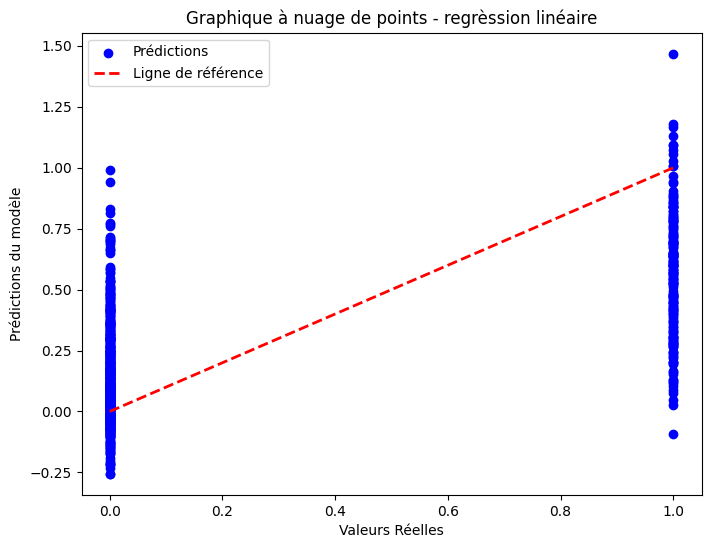

In [131]:
# Créez un graphique à nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, c='red', label='Ligne de référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions du modèle')
plt.title('Graphique à nuage de points - regrèssion linéaire')
plt.legend()
plt.show()

In [ ]:
# Graphique


> # **Le modéle KNN**




#### **Q6) Créez et entraînez un modèle KNN appelé KNN en utilisant les données d'entraînement (`x_train`, `y_train`) avec le paramètre `n_neighbors` défini sur `4`.**

In [133]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train,)
KNN

KNeighborsClassifier(n_neighbors=4)

#### **Q7) Utilisez maintenant la méthode `predict` sur les données de test (`x_test`) et enregistrez-la dans le tableau `predictions`.**

In [161]:
predictions = KNN.predict(x_test)

In [162]:
predict_proba = KNN.predict_proba(x_test)

#### **Q8) À l'aide des « prédictions » et de la trame de données « y_test », calculez la valeur de chaque métrique à l'aide de la fonction appropriée.**

In [135]:
KNN_Accuracy_Score = accuracy_score(predictions, y_test)
KNN_JaccardIndex = jaccard_score(predictions, y_test)
KNN_F1_Score = f1_score(predictions, y_test)

In [136]:
Report_KNN = {"Accuracy_Score":KNN_Accuracy_Score, "JaccardIndex":KNN_JaccardIndex, "F1_Score":KNN_F1_Score}
Report_KNN = pd.DataFrame([Report_KNN])
Report_KNN

,Accuracy_Score,JaccardIndex,F1_Score
0,0.812214,0.394089,0.565371


#### **Graphique pour le modèle KNN**

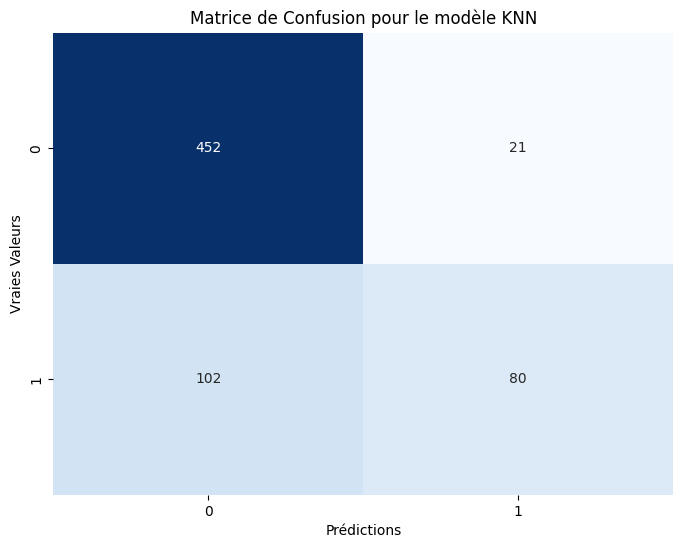

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenez les prédictions de votre modèle (y_pred) et les vraies valeurs (y_true)
# Créez une matrice de confusion
confusion = confusion_matrix(y_test, predictions)

# Affichez la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion pour le modèle KNN')
plt.show()

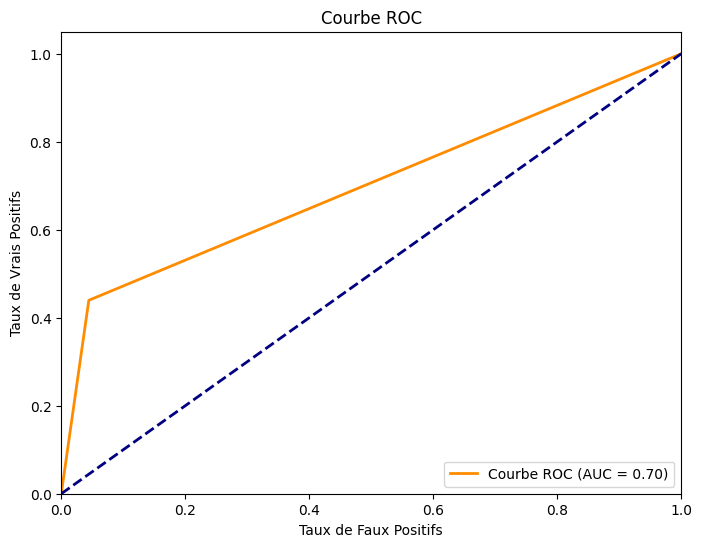

In [163]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculez l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracez la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


### **Decision Tree**


#### **Q9) Créez et entraînez un modèle d'arbre de décision appelé Tree en utilisant les données d'entraînement (`x_train`, `y_train`).**

In [172]:
Tree = DecisionTreeClassifier().fit(x_train, y_train)
Tree

DecisionTreeClassifier()

#### **Q10) Utilisez maintenant la méthode `predict` sur les données de test (`x_test`) et enregistrez-la dans le tableau `predictions`.**

In [179]:
predictions = Tree.predict(x_test)

In [180]:
predict_proba=Tree.predict_proba(x_test)

#### **Q11) À l'aide des « prédictions » et de la trame de données « y_test », calculez la valeur de chaque métrique à l'aide de la fonction appropriée.**

In [175]:
Tree_Accuracy_Score = accuracy_score(predictions, y_test)
Tree_JaccardIndex = jaccard_score(predictions, y_test)
Tree_F1_Score = f1_score(predictions, y_test)

In [176]:
Report_tree = {"Accuracy_Score":Tree_Accuracy_Score, "JaccardIndex":Tree_JaccardIndex, "F1_Score":Tree_F1_Score}
Report_tree = pd.DataFrame([Report_tree])
Report_tree

,Accuracy_Score,JaccardIndex,F1_Score
0,0.758779,0.360324,0.529762


#### **La représentation graphique**

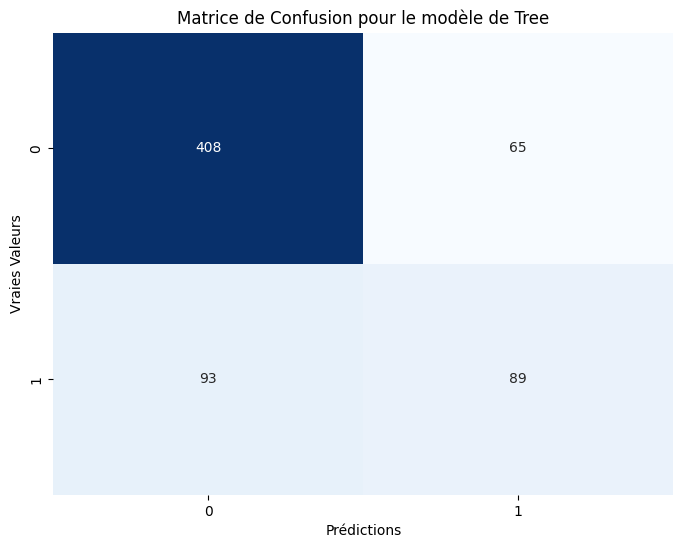

In [177]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenez les prédictions de votre modèle (y_pred) et les vraies valeurs (y_true)
# Créez une matrice de confusion
confusion = confusion_matrix(y_test, predictions)

# Affichez la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion pour le modèle de Tree')
plt.show()

### **Logistic Regression**


#### **Q12) Utilisez la fonction `train_test_split` pour diviser les dataframes `features` et `Y` avec un `test_size` de `0.2` et le `random_state` défini sur `1`.**

In [144]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=1)


#### **Q13) Créez et entraînez un modèle LogisticRegression appelé LR en utilisant les données d'entraînement (`x_train`, `y_train`) avec le paramètre `solver` défini sur `liblinear`.**

In [145]:
LR = LogisticRegression(solver='liblinear').fit(x_train, y_train)
LR

LogisticRegression(solver='liblinear')

#### **#### Q14) Maintenant, utilisez les méthodes `predict` et `predict_proba` sur les données de test (`x_test`) et enregistrez-les sous 2 tableaux `predictions` et `predict_proba`.**

In [147]:
predictions = LR.predict(x_test)

In [148]:
predict_proba = LR.predict_proba(x_test)
predict_proba = {'Classe_0':predict_proba[:,0], 'Classe_1':predict_proba[:,1]}
predict_proba = pd.DataFrame(predict_proba)
predict_proba

,Classe_0,Classe_1
0,0.745748,0.254252
1,0.975064,0.024936
2,0.508246,0.491754
3,0.847275,0.152725
4,0.968432,0.031568
...,...,...
650,0.328915,0.671085
651,0.613531,0.386469
652,0.980149,0.019851
653,0.701313,0.298687


#### **Q15) À l'aide des « prédictions », « predict_proba » et du dataframe « y_test », calculez la valeur de chaque métrique à l'aide de la fonction appropriée.**

In [149]:
LR_Accuracy_Score = accuracy_score(predictions, y_test)
LR_JaccardIndex = jaccard_score(predictions, y_test)
LR_F1_Score = f1_score(predictions, y_test)
LR_Log_Loss = log_loss(predictions, predict_proba)
LR_Log_Loss

0.1830859734564809

#### **Graphique pour régression Logistique**

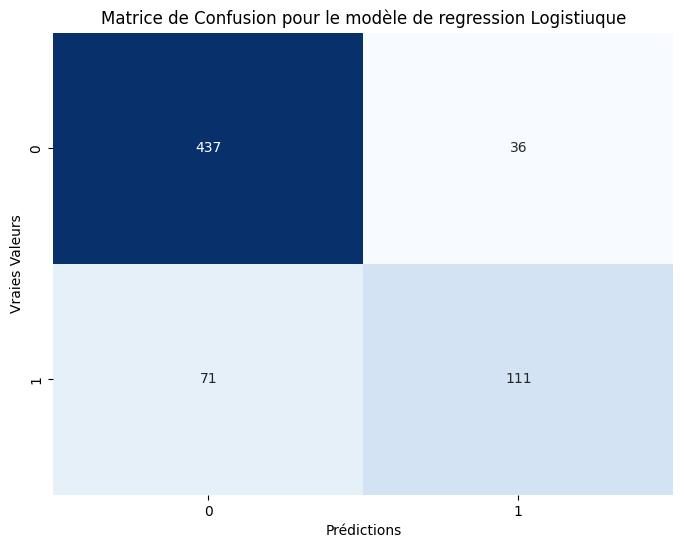

In [150]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenez les prédictions de votre modèle (y_pred) et les vraies valeurs (y_true)
# Créez une matrice de confusion
confusion = confusion_matrix(y_test, predictions)

# Affichez la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion pour le modèle de regression Logistiuque')
plt.show()

### **SVM**

#### **Q16) Créez et entraînez un modèle SVM appelé SVM en utilisant les données d'entraînement (`x_train`, `y_train`).**

In [155]:
SVM = svm.SVC(kernel='rbf').fit(x_train, y_train)
SVM

SVC()

#### **Q17) Utilisez maintenant la méthode `predict` sur les données de test (`x_test`) et enregistrez-la dans le tableau `predictions`.**

In [156]:
predictions = SVM.predict(x_test)

#### **Q18) À l'aide des « prédictions » et de la trame de données « y_test », calculez la valeur de chaque métrique à l'aide de la fonction appropriée.**

In [157]:
SVM_Accuracy_Score = accuracy_score(predictions, y_test)
SVM_JaccardIndex = jaccard_score(predictions, y_test)
SVM_F1_Score = f1_score(predictions, y_test)

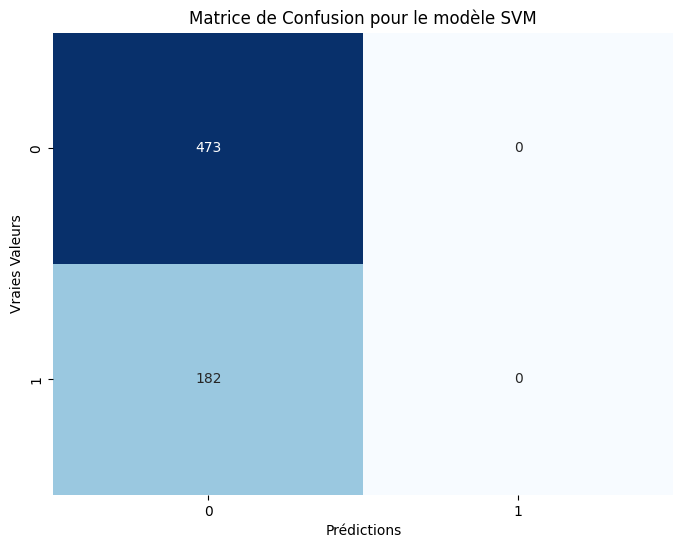

In [158]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenez les prédictions de votre modèle (y_pred) et les vraies valeurs (y_true)
# Créez une matrice de confusion
confusion = confusion_matrix(y_test, predictions)

# Affichez la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion pour le modèle SVM')
plt.show()

> ### **Rapport**

#### **Q19) Affichez la précision, l'indice Jaccard, le score F1 et la perte de log dans un format tabulaire en utilisant un bloc de données pour tous les modèles ci-dessus.**

\*LogLoss concerne uniquement le modèle de régression logistique

In [59]:
dictt = {
    "Modèle":('RegressionLineaire',"KNN", "Tree", "LR", "SVM"),
    "MAE": LinearRegression_MAE,
    "MSE": LinearRegression_MSE,
    "R2": LinearRegression_R2,
    "Accuracy_Score": (KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score),
    "JaccardIndex": (KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex),
    "F1_Score": (KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score),
    "Log_Loss": LR_Log_Loss
}

dictt
dictt = pd.DataFrame(dictt)

print(dictt)


               Modèle       MAE       MSE        R2  Accuracy_Score  \
0  RegressionLineaire  0.256309  0.340176  0.427138        0.818321   
1                 KNN  0.256309  0.340176  0.427138        0.755725   
2                Tree  0.256309  0.340176  0.427138        0.836641   
3                  LR  0.256309  0.340176  0.427138        0.722137   

   JaccardIndex  F1_Score  Log_Loss  
0      0.425121  0.596610  0.183086  
1      0.400749  0.572193  0.183086  
2      0.509174  0.674772  0.183086  
3      0.000000  0.000000  0.183086  


In [83]:
met =  {

      "metricc": ("MAE", "MSE", "R2", "Accuracy_Score", "JaccardIndex", " F1_Score", " Log_Loss"),
     "Regression_linéaire" : (LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2, "", "","", ""),
      "KNN" : ("", "", "", KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score, ""),
      "Tree":("","","", Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, ""),
      "LR": ("","","",LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss),
      "SVM":("","","",SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score, "",)
}
met
Report = pd.DataFrame(met)
Report.set_index("metricc")

,Regression_linéaire,KNN,Tree,LR,SVM
metricc,,,,,
MAE,0.256309,,,,
MSE,0.340176,,,,
R2,0.427138,,,,
Accuracy_Score,,0.818321,0.755725,0.836641,0.722137
JaccardIndex,,0.425121,0.400749,0.509174,0.0
F1_Score,,0.59661,0.572193,0.674772,0.0
Log_Loss,,,,0.183086,


## **Evaluation**

#### **Descriptions des métrics**
* **Accuracy Score (Score de Précision) :**

L'accuracy score mesure la proportion des prédictions correctes parmi toutes les prédictions.
Il est calculé comme le nombre de prédictions correctes divisé par le nombre total d'échantillons dans l'ensemble de données.
Une valeur élevée d'accuracy score indique que le modèle fait un bon travail pour prédire les classes correctes.

* **Jaccard Index :**

Le Jaccard Index, également appelé coefficient de Jaccard, mesure la similarité entre deux ensembles en comparant leurs intersections avec leurs unions.
En classification, le Jaccard Index est souvent utilisé pour évaluer la similarité entre l'ensemble des vrais labels et l'ensemble des labels prédits par le modèle.
Il est calculé en divisant le nombre d'éléments en commun par le nombre total d'éléments dans les deux ensembles.
Une valeur plus élevée du Jaccard Index indique une meilleure adéquation entre les vrais labels et les prédictions du modèle.

* **F1 Score :**

Le F1 Score est une métrique qui prend en compte à la fois la précision (proportion de vrais positifs parmi les prédictions positives) et le rappel (proportion de vrais positifs parmi toutes les instances réellement positives).
Il est calculé comme 2 fois le produit de la précision et du rappel, divisé par la somme de la précision et du rappel (F1 = 2 * (precision * recall) / (precision + recall)).
Le F1 Score est particulièrement utile lorsque les classes sont déséquilibrées. Une valeur plus élevée du F1 Score indique un meilleur équilibre entre la précision et le rappel.

* **Log Loss (Perte logarithmique) :**

Le Log Loss est une métrique utilisée principalement pour les problèmes de classification avec des probabilités de classe prédites.
Il mesure la performance d'un modèle en évaluant à quel point les probabilités prédites sont proches des vraies probabilités des classes.
Le Log Loss est souvent utilisé pour évaluer la calibration des probabilités prédites. Une valeur plus faible de Log Loss indique une meilleure calibration.

En résumé, lors de l'évaluation d'un modèle de classification, il est généralement souhaitable d'avoir un Accuracy Score élevé, un Jaccard Index élevé, un F1 Score élevé et un Log Loss faible.

 **En voyant, les valeurs des métrics de précision et les graphiques de des prédictions, c'est la regression Logistique qui prédite bien les données. Ils semble estre le meilleur modèle des 5 modèles construits.**